## ML - Do it yourself
In this notebook we will get a feel for data generation and a few models.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Gaussian distribution
- Use np.random.randn to sample 1000 numbers independently from the N(0,1) distribution. This means a random normal (or gaussian) variable with mean 0 and standard deviation 1.

In [7]:
#set seed to make notebook (almost) deterministic
np.random.seed(0)
x = np.random.randn(1000)
print(x)

[ 1.76405235e+00  4.00157208e-01  9.78737984e-01  2.24089320e+00
  1.86755799e+00 -9.77277880e-01  9.50088418e-01 -1.51357208e-01
 -1.03218852e-01  4.10598502e-01  1.44043571e-01  1.45427351e+00
  7.61037725e-01  1.21675016e-01  4.43863233e-01  3.33674327e-01
  1.49407907e+00 -2.05158264e-01  3.13067702e-01 -8.54095739e-01
 -2.55298982e+00  6.53618595e-01  8.64436199e-01 -7.42165020e-01
  2.26975462e+00 -1.45436567e+00  4.57585173e-02 -1.87183850e-01
  1.53277921e+00  1.46935877e+00  1.54947426e-01  3.78162520e-01
 -8.87785748e-01 -1.98079647e+00 -3.47912149e-01  1.56348969e-01
  1.23029068e+00  1.20237985e+00 -3.87326817e-01 -3.02302751e-01
 -1.04855297e+00 -1.42001794e+00 -1.70627019e+00  1.95077540e+00
 -5.09652182e-01 -4.38074302e-01 -1.25279536e+00  7.77490356e-01
 -1.61389785e+00 -2.12740280e-01 -8.95466561e-01  3.86902498e-01
 -5.10805138e-01 -1.18063218e+00 -2.81822283e-02  4.28331871e-01
  6.65172224e-02  3.02471898e-01 -6.34322094e-01 -3.62741166e-01
 -6.72460448e-01 -3.59553

### Convert to pandas dataframe

In [3]:
df = pd.DataFrame(x)

### Histogram
- Use np.histogram to compute histogram for x using bins [-3,-2] , [-2,1], ... , [2,3].
- Use df.hist for the same reason (bonus = plot).
- Use plt.hist to plot histogram of x.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2237bdb898>]],
      dtype=object)

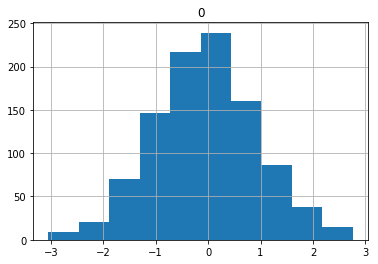

In [4]:
hist, bins = np.histogram(x, bins=range(-3,4))
df.hist()

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <a list of 10 Patch objects>)

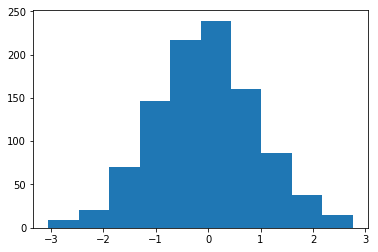

In [5]:
plt.hist(x)

### Multivariate gaussian
- Use np.random.randn to sample 1000 two-dimensional vectors independently from the N(0,1) distribution.
- Mean value should be (0,0), and the two components of the vector should be independent. Also each sample should be independent.

(The second requirement is true by default)


In [6]:
twoD = np.random.randn(1000,2)

### Scatterplot
- Split twoD into two arrays representing the two dimensions.
- Use plt.scatter to draw the scatter plot.

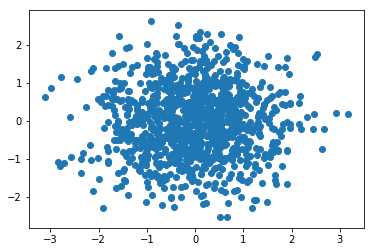

In [7]:
x = twoD[:,0]
y = twoD[:,1]
plt.scatter(x,y)

### Scale and translate
- Transform twoD by scaling both axes by 2.
- Transform twoD by adding 5 to x and subtracting 5 from y.
- Compute mean (along axis 0) and standard deviation as a sanity check. Means should be close to [1,-1] and standard deviations should be close to [2,2].
- Draw the scatter plot again.

In [8]:
twoD *= 2
twoD[:,0] += 5
twoD[:,1] -= 5

### Append more rows
- Sample another 1000 samples of 2D gaussian distribution, again N(0,1) independent entries.
- Create a concatenated 2D array with twoD followed by the additional samples. For this use np.vstack.

In [9]:
twoD2 = np.random.randn(1000,2)
X = np.vstack([twoD, twoD2])

In [10]:
assert twoD2.shape == (1000,2)
assert X.shape == (2000,2)

### Adding labels
- Make a numpy array with shape (2000,1): 1000 entries of 1 followed by 1000 entries of -1. For this use np.ones and np.vstack. Note that np.ones will need a tuple or similar as argument. (By the way np.zeros is a similar function).
- Stack this to the right of X to obtain a (2000,3) shaped array.

In [11]:
Y = np.vstack([np.ones((1000,1)),-1*np.ones((1000,1))])
data = np.hstack([X, Y])

In [12]:
assert Y.shape == (2000,1)
assert Y.sum() == 0
assert Y[0] == 1
assert data.shape == (2000,3)
assert data[:,2].sum() == 0

### Scatter plot
- The first 1000 rows with gray. Color is set by the named argument c.
- The remaining rows with pink.

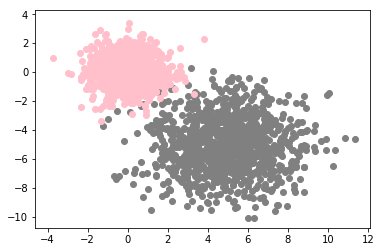

In [13]:
plt.scatter(twoD[:,0], twoD[:,1], c='gray')
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')

### Shuffle the rows
- Use np.random.permutation to create a random index to shuffle the rows with.
- Use indexing to create a shuffled version of the data.
- Do the same using np.random.shuffle.

In [14]:
perm = np.random.permutation(2000)
data = data[perm]
# shuffle again
np.random.shuffle(data)

In [15]:
assert data[:,2].sum() == 0

### Sklearn
Sklearn, or scikit-learn, is a very popular, lightweight and easy to use library for machine learning.
It allows you to train models using a few lines of code but still is flexible for extension, varying algorithms, metrics, loss-functions and other hyper parameters.

We will train a logistic regression model for the same data set as above.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
reg = LogisticRegression()

ML algorithms, or Inducers, in sklearn have few but important methods. Take a look at the help for 'fit' and 'predict'. Also if you type reg.<tab\> you will see what methods are supported.

### Exercise
- Fit the logistic regression model to data

In [18]:
X = data[:,:-1]
Y = data[:,-1]
reg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can see all the values of hyperparameters used above. We can also programatically access them:

In [19]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The weights can be accessed like so:

In [20]:
a,b = reg.coef_[0]
c = reg.intercept_[0]
(a,b,c)

(1.5512003781021058, -1.8785326262415398, -6.080486815799507)

### Plot
We use the same code as above to plot the logistic regression decision boundary.

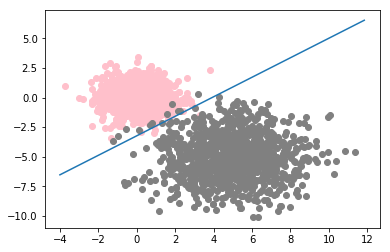

In [21]:
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')
plt.scatter(twoD[:,0], twoD[:,1], c='gray')
ticks = [-4 + 0.16*t for t in range(100)]
boundary_y = [-(a*x + c)/b for x in ticks]
boundary_y = [b if b < 15 else 15 for b in boundary_y]
boundary_y = [b if b > -15 else -15 for b in boundary_y]
plt.plot(ticks, boundary_y)


### Exercise
- Get the model's predictions for the entire data set.
- Compute the accuracy of the classifier on the training set.

In [23]:
pred = reg.predict(X)
(pred == Y).sum()/2000

0.993

### Exercise
- Perform 5-fold cross validation with logistic regression by using cross_val_score.
- The evaluation metric is accuracy.
- Only 1 line of code!

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
reg = LogisticRegression()
cross_val_score(reg, X, Y, scoring='accuracy', cv=5)

array([0.9925, 0.99  , 0.99  , 0.99  , 0.9975])

For other metrics see http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

## Learning Curve

In [26]:
from sklearn.model_selection import learning_curve

### Exercise
- Retrain the logistic regression model above but use sklearn's validation_curve method to get training and validation scores over training iterations. Specify train_sizes=np.linspace(0.1, 1.0, 200) and use 5 fold cross validation.
- Average the output scores over folds.
- Plot train scores and test scores in the same plot.
- Repeat the above for "neg_log_loss" instead of accuracy.

In [27]:
sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1,1.0,200))

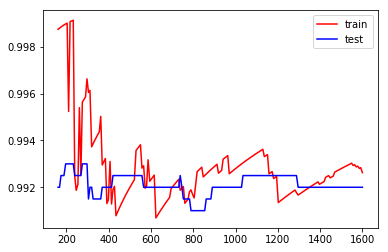

In [28]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(sizes, train_scores_mean, c='red', label='train')
plt.plot(sizes, test_scores_mean, c='blue', label='test')
plt.legend()

In [29]:
sizes, train_scores, test_scores = learning_curve(LogisticRegression(), data[:,:-1], data[:,-1], cv=5, scoring='neg_log_loss', train_sizes=np.linspace(0.1,1.0,200))

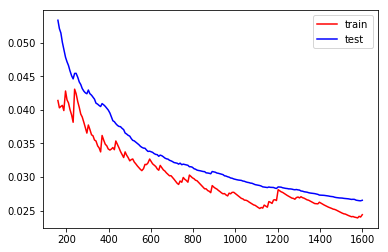

In [30]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(sizes, -train_scores_mean, c='red', label='train')
plt.plot(sizes, -test_scores_mean, c='blue', label='test')
plt.legend()

## Validation Curve

In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

### Exercise
- Use np.logspace to create a list of values _params_ $=10^{-4},10^{-3},10^{-2},10^{-1},10^{0},10^{1}$.
- Use validation_curve to train a logistic regression model on 'digits' data. The parameter C should take on the values above. Use 5-fold crossvalidation and negative log loss. However when plotting use plt.semilogx instead of plt.plot.
- Take averages over folds and plot average train loss and average validation loss vs _params_.

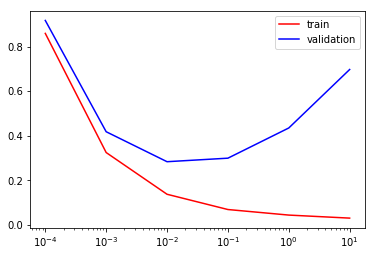

In [32]:
# loads hand written character image data
digits = load_digits()
X, y = digits.data, digits.target

params = np.logspace(-4,1,6)
train_scores, valid_scores = validation_curve(reg, X, y, 'C', params, cv=5,scoring='neg_log_loss')

train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
assert train_scores_mean.shape == (6,)
assert valid_scores_mean.shape == (6,)

plt.semilogx(params, -train_scores_mean, c='red', label='train')
plt.semilogx(params, -valid_scores_mean, c='blue', label='validation')
plt.legend()

### Manually setting parameters

In [33]:
reg.set_params(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Retrain
Now rerun your cell above and check the resulting graph.

## Gridsearch

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

### Exercise
- Read the help on GridSearchCV.
- Set parameters correctly so that
    - when _kernel_ is 'poly' then _degree_ takes the values 1,2 and 3
    - when _kernel_ is 'rbf', then _C_ takes values 1 and 10
    - when _kernel_ is 'linear', then _C_ and _gamma_ take on all combinations of \[1,10\] and \[0.1,1\].
- Run the cell to fit a lot of models to iris data or digits data!
- Study the result.

In [36]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

iris = datasets.load_iris()
digits = datasets.load_digits()

parameters = [{'kernel':['poly'], 'degree':[1, 2,3]}, {'kernel': ['rbf'], 'C': [1,10]}, {'kernel': ['linear'], 'C': [1,10], 'gamma': [0.1,1]}]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(iris.data, iris.target)
#clf.fit(digits.data, digits.target)
df = pd.DataFrame(clf.cv_results_)
# should be 9 parameter settings
assert df.shape[0] == 9 
df.sort_values('mean_test_score', ascending=False, inplace=True)
important_cols = [col for col in df.columns.values if not 'split' in col]
df[important_cols]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_kernel,param_C,param_gamma,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.000345,0.000095,0.000175,5.092874e-05,1,poly,NaN,NaN,"{'degree': 1, 'kernel': 'poly'}",0.980000,0.030551,1,0.981481,0.005972
1,0.000396,0.000053,0.000181,3.127736e-05,2,poly,NaN,NaN,"{'degree': 2, 'kernel': 'poly'}",0.980000,0.042687,1,0.981481,0.006829
3,0.000388,0.000020,0.000146,8.675292e-07,NaN,rbf,1,NaN,"{'C': 1, 'kernel': 'rbf'}",0.980000,0.030551,1,0.985926,0.005185
7,0.000334,0.000089,0.000175,6.388009e-05,NaN,linear,10,0.1,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.980000,0.042687,1,0.980000,0.006667
8,0.000336,0.000071,0.000172,5.966014e-05,NaN,linear,10,1,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",0.980000,0.042687,1,0.980000,0.006667
2,0.001617,0.000923,0.000140,6.920056e-06,3,poly,NaN,NaN,"{'degree': 3, 'kernel': 'poly'}",0.973333,0.044222,6,0.981481,0.006829
4,0.000361,0.000021,0.000144,7.283483e-06,NaN,rbf,10,NaN,"{'C': 10, 'kernel': 'rbf'}",0.973333,0.044222,6,0.977037,0.007734
5,0.000250,0.000012,0.000136,4.080303e-06,NaN,linear,1,0.1,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.973333,0.044222,6,0.988148,0.004914
6,0.000249,0.000010,0.000137,7.862031e-06,NaN,linear,1,1,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.973333,0.044222,6,0.988148,0.004914


### Training with without a lib
For the sport of it we will do our own version of gradient descent and see if we can learn something!

First off, we will use the data set we just created and build a linear binary classifier for it.
That is, $h(x,y) = ax + by + c$.

The last term is called the bias term. Note that the classifier is a dot-product of vectors:

$h(x,y) = w \cdot X$, where

$w = [a,b,c]$, and

$X = [x,y,1]$.

Thus we have three things at play, the hypothesis $h$, its weight vector $w$, and an augmented feature vector $X$.
Note that implementing the bias by adding this last 'always-on' feature to $X$ makes the formula for $h$ very elegant.

Now imagine we have a loss function $L$, but we haven't decided quite yet which loss function we want.
For each example $(X,c)$, where $c$ is the target, the loss for that example is $L = L(h(X),c)$. We can see this as having one loss-function for $c=-1$ and one for $c=1$, but for this example we are using one of these. To simplify further and lets assume $L = L(ch(X))$.

Let's differentiate one of these with respect to one of the weights $w_i$:

$$\frac{\partial L}{\partial w_i} = L'(ch(X)) \frac{\partial ch(X)}{\partial w_i} = L'(ch(X)) \frac{\partial (w \cdot X)}{\partial w_i} = cL'(ch(X))X_i$$.

Putting the three partial derivatives in one vector gives us the gradient of the loss

$$\nabla_w L = cL'(ch(X))X$$.

Let's pause and examine. The number $cL'(ch(X))$, whatever it is can be seen as a weight or importance of the example X. What gradient descent now wants to do is add $\nabla_w L$ to the weight vector $w$. So some conclusions:

- The update to $w$ is a linear combination of all the examples $X$.
- In general $w = w_0 + X^T W$, that is, a (small) start value plus a linear combination of the training examples.
- To compute the gradient, we don't need a formula for $L$, we can design $L'$ directly!

In general it is better to have a loss function that focuses on the biggest mistakes. An idea we can try is to let
$$L'(h(X),c) = e^{-ch(X)}$$.

So if $c=1$, the examples with lowest $h(X)$ will be seen as the most important mistakes, and for $c=-1$, the training will focus on examples with highest $h(X)$.

We have to apply one trick. This loss will strongly focus on the single or few biggest mistakes which makes learning unstable and noisy. A remedy is to take the median of $L'$ over all examples and truncate $L'$ at a maximum of the median value.

Finally we will normalize the example weights so that they sum to $1$.

### Exercise
- Define the derivative of L as a function to be the exponential function above. Use np.exp.
- Note that we want L' and not cL'.
- The function has only one argument s, which means the caller should provide the value $s=ch(X)$.
- Name the function dL.

In [37]:
def dL(s):
    return np.exp(-s)

### Exercise
- Define the hypothesis as a function h(X,w).
- The weight vector w has shape (3,).
- The input X is a numpy array with shape (N,3).
- The output is a numpy array with shape (N,).

Comment: the output represents the classifier's score for all of the $N$ examples.

Hint: You can use matrix multiplication or indexing.

In [38]:
def h(X,w):
    return np.matmul(X,w)

### Exercise
- Create X by copying data.
- Replace the target column's values by all 1's.

In [39]:
X = data.copy()
X[:,2] = 1

### Exercise
- Fill in the gaps in the fit method below, indicated by tripple comments ###.

accuracy for epoch 0 is 0.2205
accuracy for epoch 1 is 0.719
accuracy for epoch 2 is 0.7505
accuracy for epoch 3 is 0.7825
accuracy for epoch 4 is 0.816
accuracy for epoch 5 is 0.852
accuracy for epoch 6 is 0.876
accuracy for epoch 7 is 0.905
accuracy for epoch 8 is 0.92
accuracy for epoch 9 is 0.938
accuracy for epoch 10 is 0.9505
accuracy for epoch 11 is 0.957
accuracy for epoch 12 is 0.965
accuracy for epoch 13 is 0.9695
accuracy for epoch 14 is 0.972
accuracy for epoch 15 is 0.976
accuracy for epoch 16 is 0.977
accuracy for epoch 17 is 0.9785
accuracy for epoch 18 is 0.9785
accuracy for epoch 19 is 0.982


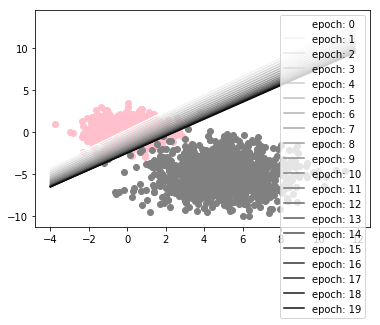

In [40]:
# Learning rate, try different values if you want. What is the connection to epochs?
lr = 1.5
# Epochs is the number of passes through the data and also the number of weight updates.
epochs = 20

# x values for plotting
ticks = [-4 + 0.16*t for t in range(100)]

# plot data 
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')
plt.scatter(twoD[:,0], twoD[:,1], c='gray')

# initialization of weights
w = np.random.randn(3)

for epoch in range(epochs):
    # compute gradient
    scores = h(X,w)
    sign_scores = scores * data[:,2]
    acc = (sign_scores > 0).sum()/2000
    print('accuracy for epoch %s is %s' % (epoch, acc))
    example_weights = dL(sign_scores)
    median = np.median(example_weights)
    example_weights = np.array([w if w < median else median for w in example_weights])
    example_weights /= example_weights.sum()
    example_weights = example_weights * data[:,2]
    grad = np.matmul(X.T,example_weights)
    # update weights
    w += lr*grad
    a, b, c = w
    # y-values of the decision boundary line
    boundary_y = [-(a*x + c)/b for x in ticks]
    boundary_y = [b if b < 15 else 15 for b in boundary_y]
    boundary_y = [b if b > -15 else -15 for b in boundary_y]
    gray = 1-epoch/epochs
    plt.plot(ticks, boundary_y, label='epoch: ' + str(epoch), c = (gray,gray,gray))
    
plt.legend()
plt.show()